<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/math/probability_%26_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률 및 통계

## 1. 모집단 및 표본

### 추측 통계란?

- 일부 데이터로부터 전체의 통계적 성질을 추측하는 방식
- 관측 대상 전체의 통계적 성질을, 그 관측 대상의 일부분만 사용하여 추측

### 기술통계란?

- Ch2~3에서 배운 것처럼, 전체 데이터의 통계 지표를 계산하는 방식

In [1]:
# 라이브러리 및 Boston House Price 데이터 세팅

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline
pd.set_option('precision', 3)
np.set_printoptions(precision=3)

from sklearn.datasets import load_boston

boston_houseprice_data = load_boston()
df = pd.DataFrame(
    data = boston_houseprice_data.data, 
    columns = boston_houseprice_data.feature_names
)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14
2,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03
3,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94
4,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33


### 모집단(母集團 - population) : 모체가 되는 집단
- 추측하고 싶은 관측 대상 전체
  - 모수 : 모집단의 평균(모평균), 분산(모분산), 상관계수 등

### 표본(標本 ‒ sample) : 통계에서 조사를 위해서 데이터(표적)를 추출하는 것

- 추측에 사용되는 관측 대상의 일부분
  - 표본 추출(sampling) : 모집단에서 표본을 골라내는 일 
  - 표본 크기(sample size) : 골라낸 표본의 수
  - 표본통계량 : 표본을 바탕으로 계산한  
  평균(표본평균), 분산(표본분산), 상관계수 등

### 모집단 내 표본 추출의 필요성

![스크린샷 2022-12-22 오전 12 24 48](https://user-images.githubusercontent.com/96982072/208941095-94554fc7-e0e1-4145-aeab-335ace7cc3f0.png)


1. 조사해야하는 데이터 양이 많을 때
2. 뿐만 아니라 모든 데이터를 조사하기에 환경적인 어려움이 있을 때

### 추정량 (estimator)
- 표본평균으로 모평균을 추측할 때,
  - 표본평균 = 모평균의 추정량(estimator) ( ≈ 추상적인 형태로 표현 ) 
  
### 추정치 (estimate)
- 실제 표본의 데이터 값들을 이용하여 계산한 결과( ≈ 구체적인 실제 값을 활용)

### 추정량 & 추정치 예시
- A 학생은 모평균(전교생 영어 점수의 평균)의 추정량으로 표본평균(표본집단의 영어 점수의 평균)을 선택하였으며, 그 추정값(실제 표본 데이터 값들의 평균)이 70.4점이었다

### 표본 추출 방법 1 - 무작위 추출(random sampling) 

- 편향이 심할 가능성이 높은 일반적인 방법은 X
  - 일반적으로 교내에서 점수 데이터를 모은다고 가정하면 아래와 같이 편향되기 쉽다
    1. 자신과 친하게 지내는 친구 20명에게 표본을 얻는다(같은 학년으로 편향될 가능성 높음)

    2. 자신이 활동중인 동아리원 20명에게 표본을 얻는다 ( 동아리란 특성에 의해 편향될 가능성 있음)

- 편향되지 않도록, 다양한 학년, 여러 동아리에서 활동하는 학생들, 다양한 취미 생활을 하는 학생들에게 점수를 물어보아야 함
  - 즉, ‘우연히 만나는’ 학생들로부터 임의로 표본을 무작위 추출(random sampling)하는 것이 중요하다 
  * 하지만, 무작위 추출 또한 편향될 수 있음은 주의하기 바란다

### 표본 추출 방법 2 ‒ 복원 추출 / 비복원 추출 

- 무작위 추출 시, 같은 사람에게 여러 번 시험 결과를 들을 가능성이 존재한다

- 복원 추출 (sampling with replacement) 
  - 위와 같이 여러 차례 동일한 표본을 선택하는 추출 방법
- 비복원 추출 (sampling without replacement) 
  - 동일한 표본은 한 번만 선택하는 방법

### 표본 추출 with Python [1]
- 무작위 추출시, `numpy.random.choice()` 활용


In [3]:
np.random.choice([1,2,3],3)

array([1, 3, 3])

- 기본 설정이 복원추출이므로, 비복원추출시 `replace=False`를 인자로 넣어야함


In [4]:
np.random.choice([1,2,3],3, replace=False)

array([2, 1, 3])

- 무작위 추출시, 계산값이 매번 랜덤하게 바뀌는 특성이 있다
  - 이는 랜덤 시드(seed)를 활용하면, 매번 동일한 난수(무작위 추출된 값)를 얻는 것이 가능하다

In [5]:
np.random.seed(0)
np.random.choice([1,2,3], 3)

array([1, 2, 1])

### 표본 추출 with Python [2] : Boston House Price Dataset 활용

- ’AGE’ 데이터의 표본평균 계산 : 58.785


In [6]:
np.random.seed(0)
sample = np.random.choice(df['AGE'], 20)
sample.mean()

58.785000000000004

- ‘AGE’ 데이터의 모평균 계산 : 68.575

In [7]:
df['AGE'].mean()

68.57490118577076

### 표본 추출 with Python [3] : Boston House Price Dataset 활용
- ’AGE’ 데이터, 5번의 무작위 추출을 통해 표본평균 계산


In [8]:
for i in range(5):
    sample = np.random.choice(df['AGE'], 20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균 :', sample.mean())

1번째 무작위추출로 얻은 표본평균 : 60.43000000000001
2번째 무작위추출로 얻은 표본평균 : 73.33500000000001
3번째 무작위추출로 얻은 표본평균 : 75.33500000000001
4번째 무작위추출로 얻은 표본평균 : 68.7
5번째 무작위추출로 얻은 표본평균 : 77.20000000000002


- ‘AGE’ 데이터의 모평균 계산값과 유사한 경우가 다수 존재함을 확인

In [9]:
df['AGE'].mean()

68.57490118577076

## 2. 확률 및 확률 분포

### 무작위 추출의 문제점
- 임의로 표본을 선택하는 것이므로, 추출 후 어떤 결과가 나올지 확인하기 어렵다
- 어제와 오늘의 결과가 다르며, 내일의 결과를 예측하기도 어렵다

### 확률 (Probability)
- 무작위 추출의 불확정성을 수반한 현상을 해석하기 위한 개념

### 확률의 기본 : 확률변수 
- 주사위를 굴릴 때,1~6의 숫자 중 하나의 값이 동일한 확률로 나온다는 것을 경험적으로 알고있다

- 확률변수 (Random Variable) 
  - 결과를 예측할 수는 없지만,취하는 값과 그 값이 나올 확률이 결정되어 있는 것

  ![스크린샷 2022-12-22 오전 12 35 11](https://user-images.githubusercontent.com/96982072/208943200-f3abfbb7-def1-4ff3-8893-7ba67c1e7c40.png)

### 확률의 기본 개념

- 시행(Trial) 
  - 실제 경험을 통해 확률변수의 결과를 관측하는 것
- 실현값(Realization) 
  - 시행에 의해 관측되는 값
- 사건(Event)
  - '눈이 1' 혹은 '눈이 홀수'와 같이, 시행 결과로 나타날 수 있는 일
- 근원사건(Elementary Event) 
  - ‘눈이 1’처럼 더이상 세부적으로 분해할 수 없는 사건

### 확률 예시

- 사건에 대해서 정의되며, 주사위를 던지는 시행에서  
  ‘눈이 1’이라는 사건에 대한 확률은 $ 1 \over 6 $  
  ‘눈이 홀수’라는 사건에 대한 확률은 $ 1 \over 2 $ 이다

### 수식으로 확률 표현하기
- ‘확률변수 X = 주사위의 눈’이라고 가정
- ‘눈이1’이 되는 사건의 확률이 $ 1 \over 6 $ 인 것은 아래와 같이 표현 된다

$$ P(X = 1) = { 1 \over 6 } $$

- ‘눈이 홀수’라는 사건의 확률은 아래와 같이 표현된다.
  
$$ P((X = 1) \cup (X = 3) \cup (X = 5)) = P(X = 1) + P(X = 3) + P(X = 5) $$  
$$ = { 1 \over 6 } + { 1 \over 6 } + { 1 \over 6 } $$  
$$ = { 1 \over 2 } $$

- 상호배반(Mutually Exclusive)
  - 각 사건이 동시에 일어날 수 없음을 나타낸다

### 확률분포 (Probability Distribution)
 - 확률변수가 어떤 값과 확률로 움직이는지를 표현한 것
  - 공정한 주사위   
  ![스크린샷 2022-12-22 오전 12 53 51](https://user-images.githubusercontent.com/96982072/208947189-df8bc131-c6bf-46f5-9d53-755588b5bbc4.png)

  - 불공정한 주사위  
  ![스크린샷 2022-12-22 오전 12 53 59](https://user-images.githubusercontent.com/96982072/208947183-c3bd0fa0-c52b-47f0-be35-f10ac03ede5c.png)

### 확률분포 기반 데이터 추출 (Numpy) 

- 불공정한 주사위의 확률분포  
![스크린샷 2022-12-22 오전 12 53 59](https://user-images.githubusercontent.com/96982072/208947183-c3bd0fa0-c52b-47f0-be35-f10ac03ede5c.png)




In [10]:
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [11]:
np.random.choice(dice, p=prob)

2

### 확률분포 기반 데이터 추출 (Numpy) - 100번 시행하기

In [12]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([5, 2, 3, 4, 6, 2, 6, 2, 6, 4, 6, 5, 6, 1, 3, 2, 4, 2, 4, 4, 2, 5,
       5, 3, 5, 2, 5, 6, 4, 5, 2, 6, 4, 3, 5, 1, 6, 1, 5, 3, 6, 6, 3, 5,
       5, 5, 3, 6, 4, 6, 5, 4, 6, 4, 6, 5, 6, 5, 6, 5, 6, 5, 4, 5, 1, 4,
       5, 4, 5, 4, 2, 4, 5, 5, 5, 5, 5, 4, 6, 4, 4, 6, 6, 5, 2, 6, 5, 6,
       3, 6, 3, 5, 2, 6, 6, 5, 4, 2, 5, 4])

### 확률분포 기반 데이터 추출 (Numpy) - 100번 시행 후 도수분포표 작성

![스크린샷 2022-12-22 오전 12 53 59](https://user-images.githubusercontent.com/96982072/208947183-c3bd0fa0-c52b-47f0-be35-f10ac03ede5c.png)

- 실제 확률 분포와 시행 후의 상대도수 값이 비슷한지 확인 필요
 

In [13]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame(
    {
        'frequency':freq,
        'relative frequency':freq/num_trial
    },
    index=pd.Index(np.arange(1,7), name='dice')
)

,frequency,relative frequency
dice,,
1,4,0.04
2,12,0.12
3,9,0.09
4,20,0.20
5,30,0.30
6,25,0.25


### 확률분포 기반 데이터 추출 (Numpy) - 100번 시행 후 데이터 시각화 
- 실제 확률분포와 약간의 오차가 있는 것으로 보임

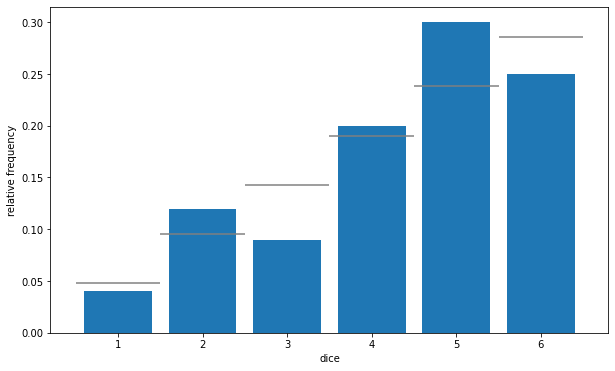

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대그래프에 계급값인 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

### 확률분포 기반 데이터 추출 (Numpy) ‒ 10,000번 시행 후 데이터 시각화 
- 실제 확률분포와 거의 흡사함을 확인

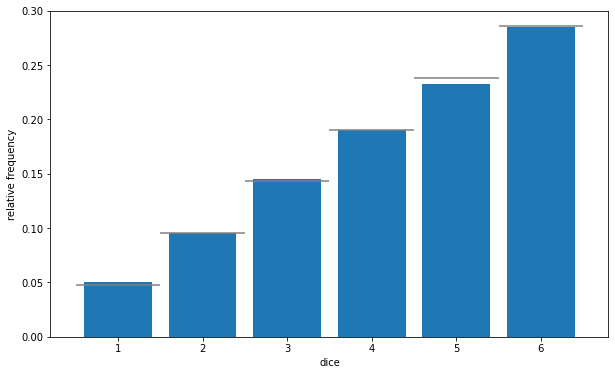

In [15]:
num_trial = 10000
sample = np.random.choice(dice, num_trial, p=prob)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대그래프에 계급값인 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

## 추측 통계 (with 보스턴 주택 ‘AGE’ 데이터) 
- 모집단의 확률분포 파악

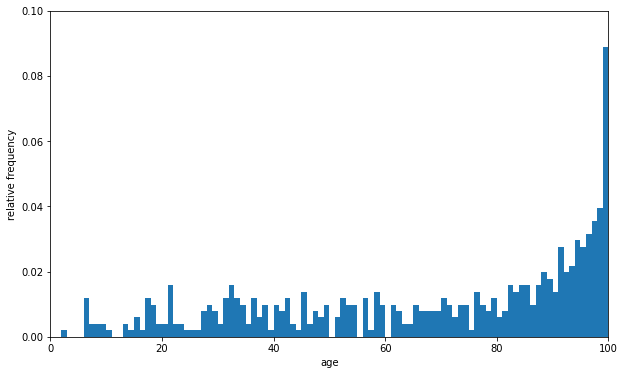

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['AGE'], bins=100, range=(0,100), density=True)
ax.set_xlim(0,100)
ax.set_ylim(0,0.1)
ax.set_xlabel('age')
ax.set_ylabel('relative frequency')

plt.show()

### 추측 통계
- 표본의 확률분포 파악 (10,000회 무작위 추출 시행)

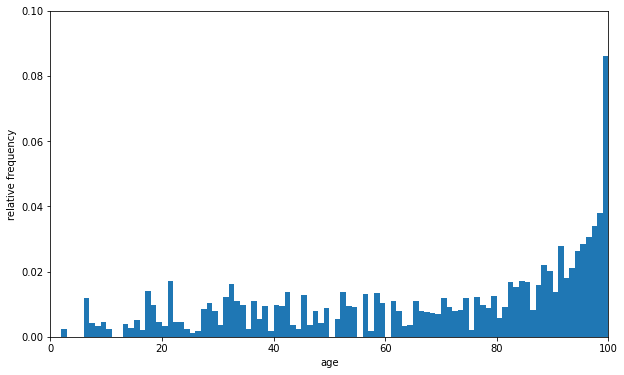

In [17]:
sample = np.random.choice(df['AGE'], 10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(0,100)
ax.set_ylim(0,0.1)
ax.set_xlabel('age')
ax.set_ylabel('relative frequency')

plt.show()

### 추측 통계
- 모집단과 표본의 확률분포가 거의 비슷함을 확인. 평균 또한 유사할까?

![스크린샷 2022-12-22 오전 1 25 50](https://user-images.githubusercontent.com/96982072/208954884-c6c7b999-3371-40f0-ad8f-5bed757a0656.png)


### 추측 통계
- 모평균 : 68.575
- 표본평균의분포(표본20개씩10,000번추출시행) 
  - 표본 평균의 분포가 모평균을 중심으로 고루 분포됨
  - 무작위 추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거!!

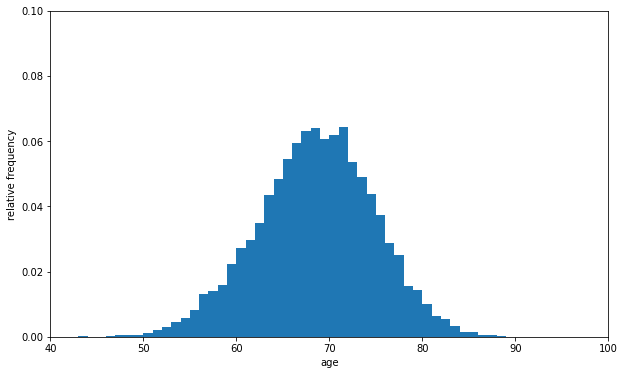

In [18]:
sample_means = [
    np.random.choice(df['AGE'], 20).mean()
    for _ in range(10000)
]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
ax.set_xlim(40,100)
ax.set_ylim(0,0.1)
ax.set_xlabel('age')
ax.set_ylabel('relative frequency')

plt.show()

## 4. 추정과 검정

### 추후 배울 내용

- Chapter 5~9 
  - 확률변수의 정의와 대표적인 확률분포
- Chapter 10~11 
  - 추측통계 ( 추정과 검정 ) 
- Chapter12 
  - 회귀분석 (여러 데이터 사이의 관계에 대해 분석하는 기법)

![스크린샷 2022-12-22 오전 1 28 46](https://user-images.githubusercontent.com/96982072/208955358-9c196441-1937-4df0-85e6-dc16b74e4741.png)

### 추정
- 모수를 추측하는 것
  - 점추정 : 하나의 값으로 추정하는 것
    - 예) 모평균을 70.4점이라는 하나의 값으로 추정하는 것
  - 구간추정: 구간으로 추정하는 것
    - 예) 모평균은 ‘68~72점 사이에 존재한다’라고 범위를 가지고 추정하는 것

### 검정
- 모집단의 통계적 성질에 대해 가설을 세우고, 
  그 가설이 옳은지 여부를 판단하는 기법
  - 예) 주사위를 100번 굴린 결과가 아래와 같을 때, 공정한 주사위인지 여부를 확인하고 싶을 때 검정을 사용
- 즉, 주사위가 공정한 주사위라는 가설을 세우고, 그 가설이 옳은지 여부를 통계학적으로 판정